# Problema de regresión diamond

In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

## Carga de datos y preparación

In [2]:
diamonds_data = pd.read_csv("./diamonds.csv")
print(diamonds_data.shape)
diamonds_data.head(5)

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Comprbamos si hay NA
diamonds_data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
print('cut - ' , diamonds_data['cut'].unique())
print('color - ' , diamonds_data['color'].unique())
print('clarity - ' , diamonds_data['clarity'].unique())

cut -  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color -  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity -  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Eliminamos la primera columna que no aporta nada y transformamos la variables categóricas en numéricas

In [3]:
diamonds_data_proc = diamonds_data.drop(columns='Unnamed: 0')

map_to_encode_cut = {
    'Fair': 1, 
    'Good': 2,
    'Very Good': 3, 
    'Premium': 4, 
    'Ideal': 5
}
map_to_encode_color =  {
    'J': 1,
    'I': 2, 
    'H': 3, 
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7,
}
map_to_encode_clarity = { 
    'I1': 1,
    'SI2': 2, 
    'SI1': 3, 
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8,
}

diamonds_data_proc['cut'] = diamonds_data_proc['cut'].apply(lambda x: map_to_encode_cut[x])
diamonds_data_proc['color'] = diamonds_data_proc['color'].apply(lambda x: map_to_encode_color[x])
diamonds_data_proc['clarity'] = diamonds_data_proc['clarity'].apply(lambda x: map_to_encode_clarity[x])


diamonds_data_proc.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


## Analisis exploratorio

Se realiza el siguiente análisis exploratorio:
* Analisis estadístico con describe
* Histográma de las variables numéricas para hacernos una idea de la distribución
* Distribución de los valores en las variables categóricas
* Boxplot de las variables numéricas para detectar los outliers y ver la distribución

In [7]:
#Analisis de las variables numéricas
diamonds_data_proc.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


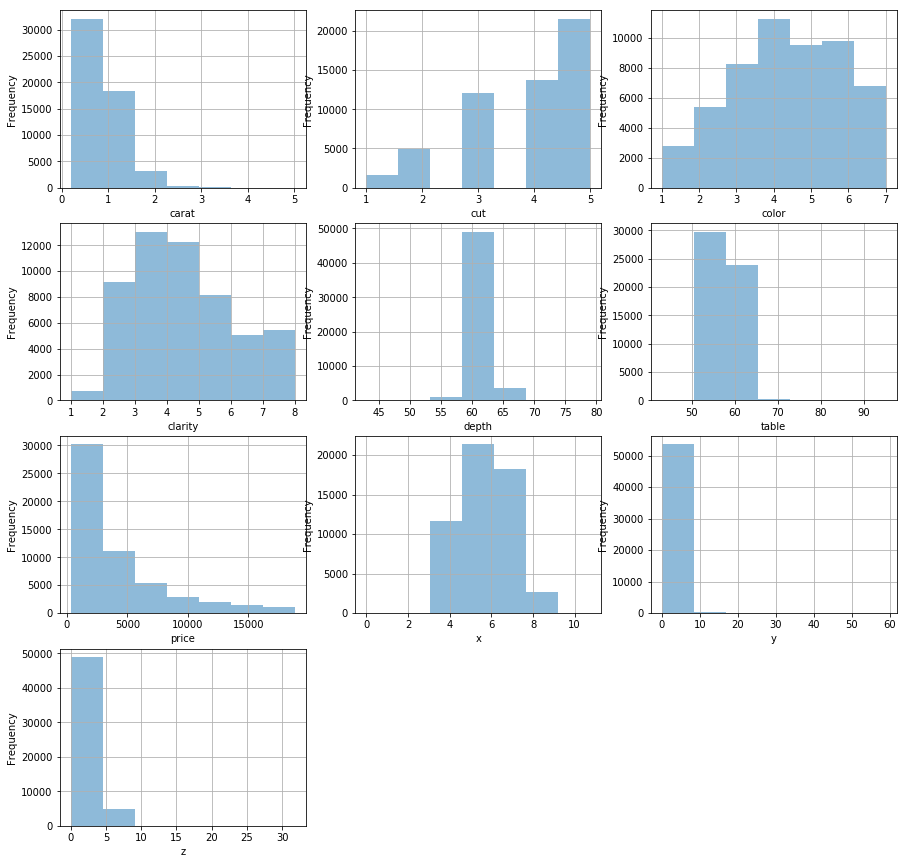

In [8]:
#Histogramas para ver la distribución de las variables numéricas

plt.figure(figsize=(15, 15))

for idx, col in enumerate(diamonds_data_proc.columns):
    plt.subplot(4,3,idx+1)
    diamonds_data_proc[col].plot.hist(alpha=0.5, bins=7, grid = True)
    plt.xlabel(col)

plt.show()

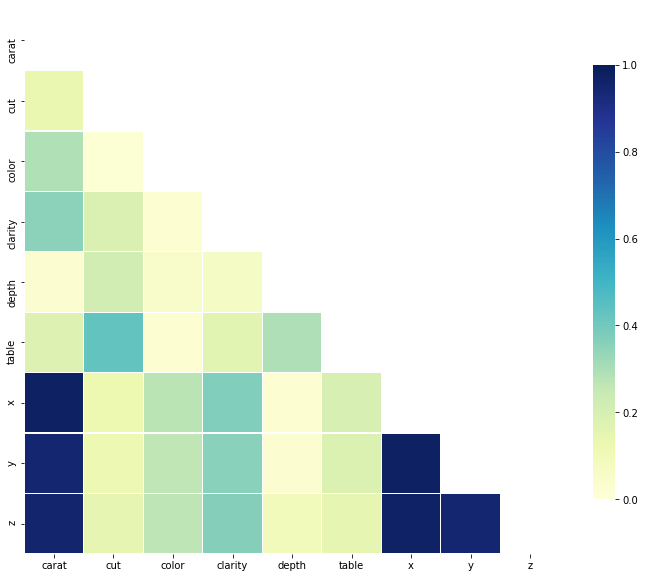

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(diamonds_data_proc.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

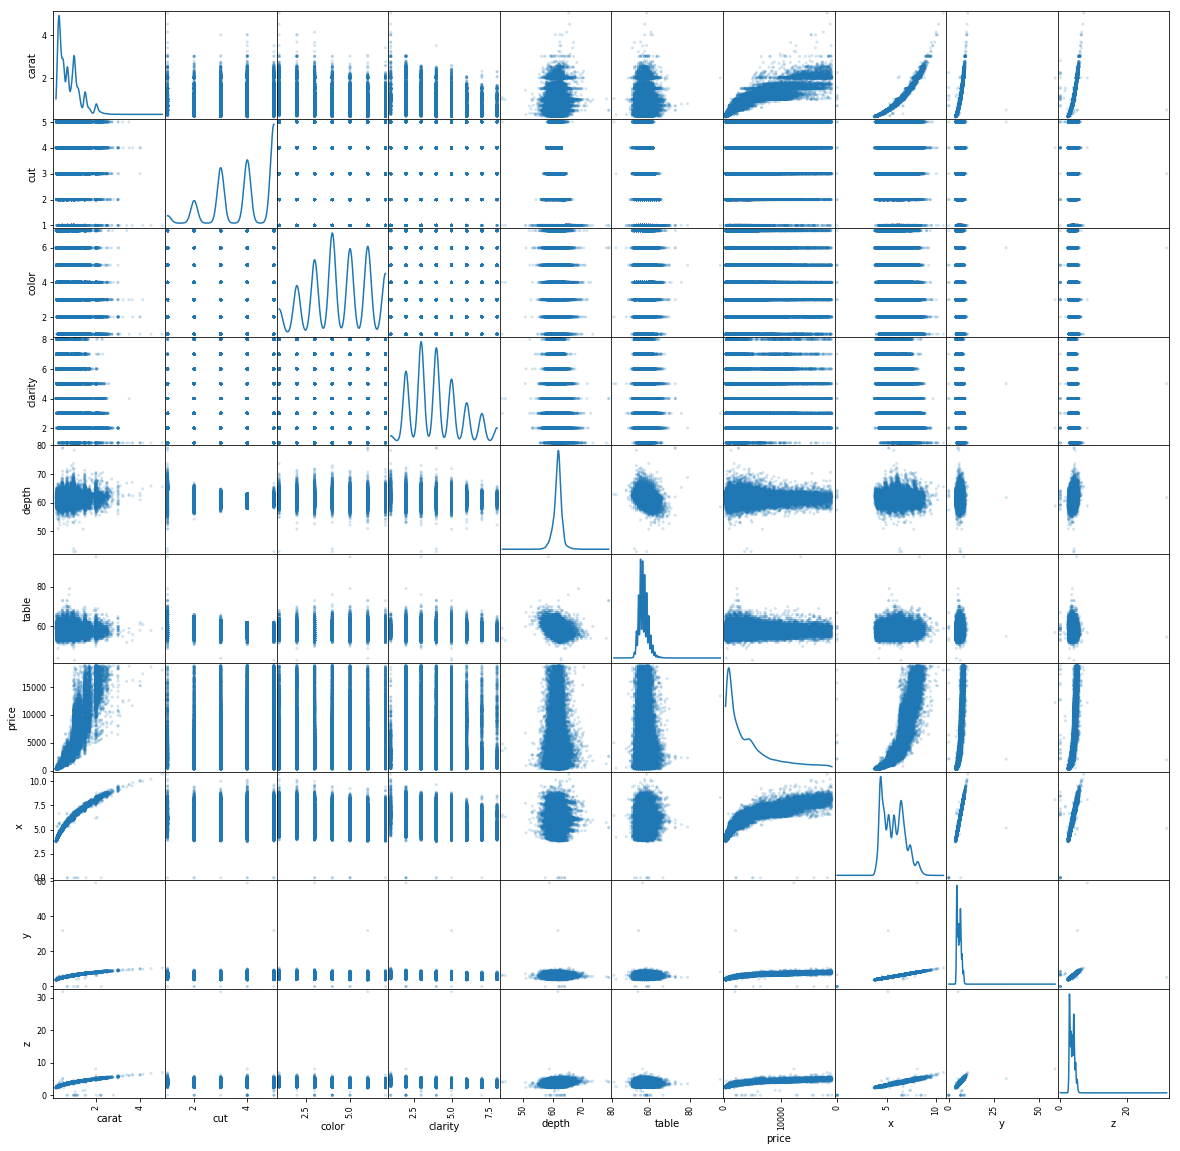

In [10]:
pd.plotting.scatter_matrix(diamonds_data_proc, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Eliminamos las variables de alta correlación, en este caso X, Y, Z que estan muy correlacionadas entre ellas y con carat que es la que dejare

In [4]:
diamonds_data_reduc = diamonds_data_proc.drop(columns=['x','y','z'])
diamonds_data_reduc.shape

(53940, 7)

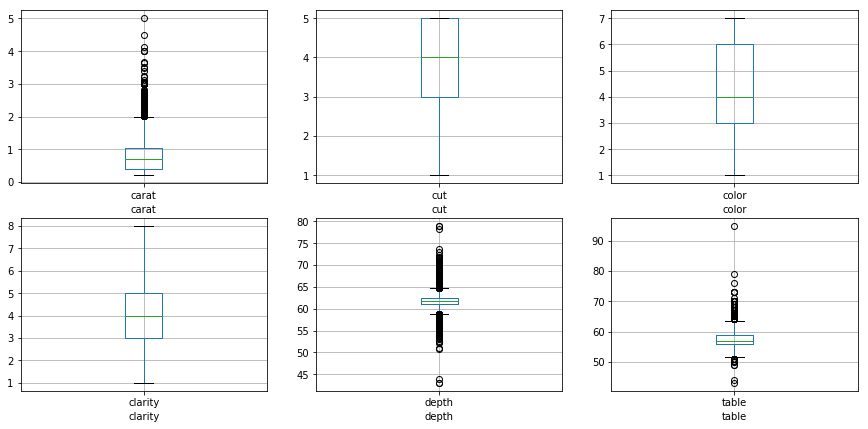

In [12]:
plt.figure(figsize=(15, 7))

for idx, col in enumerate(diamonds_data_reduc.drop(columns=['price']).columns):
    plt.subplot(2,3,idx+1)
    diamonds_data_reduc.drop(columns=['price']).boxplot(column=col)
    plt.xlabel(col)

plt.show()

En este caso decido no actuar sobre los outliers, en el caso de caret porque hay pocos valores, solo 5, y en los otros 2 casos porque la variabilidad es mu pequeña y creo que si no se van a quedar todos los valorespracticamente en el mismo rango

## Test de filtrado para seleccion de característica

Aplicamos los test de filtrado

/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


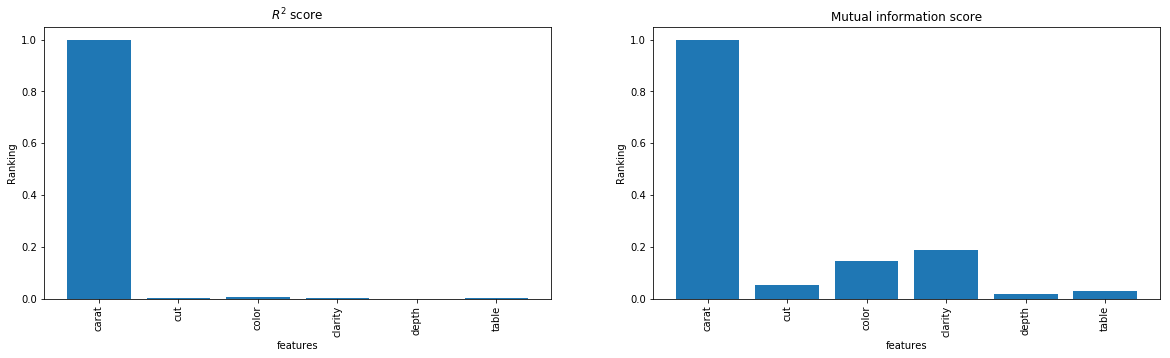

In [13]:
from sklearn.feature_selection import f_regression, mutual_info_regression

data = diamonds_data_reduc.as_matrix() 

y = diamonds_data_reduc['price'].as_matrix()
X = diamonds_data_reduc.drop(columns=['price']).as_matrix()     

feature_names = diamonds_data_reduc.drop(columns=['price']).columns


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Parece que la variable mas importante para predecir el precio va a ser carat

## Escalado de los datos

A continuación paso a escalar los datos

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train_pre, X_test_pre, y_train, y_test = train_test_split(diamonds_data_reduc.drop(['price'],axis=1), diamonds_data_reduc['price'], test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train_pre.shape)
print('Datos test: ', X_test_pre.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train_pre)
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

Datos entrenamiento:  (40455, 6)
Datos test:  (13485, 6)


## Ridge Regresion


best mean cross-validation score: -1528513.388
best parameters: {'alpha': 0.001}


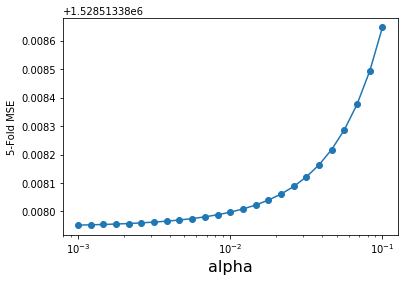

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-3,-1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)

ytrainridge = ridge.predict(X_train)
ytestridge  = ridge.predict(X_test)
mseTrainModelRidge = mean_squared_error(y_train,ytrainridge)
mseTestModelRidge = mean_squared_error(y_test,ytestridge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.53e+06
MSE Modelo Lasso (test) : 1.5e+06
carat 4167.95496100944
cut 135.7222218211307
color 541.1850204545876
clarity 857.4692176653623
depth -51.38619589041619
table -52.15999644232073


## Algoritmo de Lasso

Aplicamos laso, que es posible que reduzca la mayoria de las varibles

best mean cross-validation score: -1528513.386
best parameters: {'alpha': 0.003906939937054617}


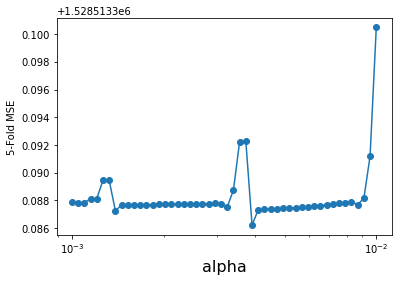

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-3,-2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.53e+06
MSE Modelo Lasso (test) : 1.5e+06
carat 4167.9464702522755
cut 135.72256497844438
color 541.1789890229758
clarity 857.4635765312306
depth -51.38069613244104
table -52.15382247842196


Tras probar con diferentes grados, la conclusión es que el mejor grado es 3, ya en 4 se produce overfiting 

Poly(1)  

MSE Modelo Lasso (train): 1.53e+06  
MSE Modelo Lasso (test) : 1.5e+06  


Poly(2)  
MSE Modelo Lasso (train): 8.17e+05  
MSE Modelo Lasso (test) : 7.78e+05  


Poly(3)  
MSE Modelo Lasso (train): 4.43e+05  
MSE Modelo Lasso (test) : 4.46e+05  

Poly(4)  
MSE Modelo Lasso (train): 4.48e+05  
MSE Modelo Lasso (test) : 4.72e+05  

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly     = PolynomialFeatures(3)
XtrainScaledPoly   = poly.fit_transform(X_train)
XtestScaledPoly   = poly.fit_transform(X_test)

/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/pablo/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

best mean cross-validation score: -666033.760
best parameters: {'alpha': 61.054022965853264}


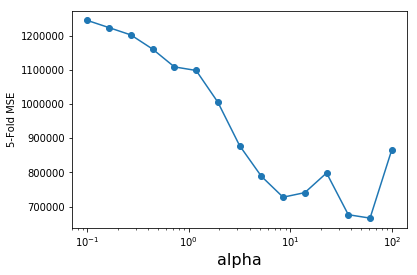

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,2,15)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaledPoly, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaledPoly,y_train)

ytrainLasso = lasso.predict(XtrainScaledPoly)
ytestLasso  = lasso.predict(XtestScaledPoly)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

MSE Modelo Lasso (train): 5.83e+05
MSE Modelo Lasso (test) : 6.2e+05


best mean cross-validation score: -1452181.727
best parameters: {'alpha': 0.1}


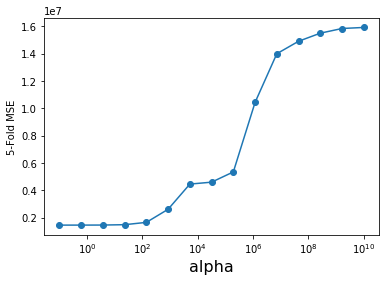

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-1,10,15)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaledPoly, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaledPoly,y_train)

ytrainridge = ridge.predict(XtrainScaledPoly)
ytestridge  = ridge.predict(XtestScaledPoly)
mseTrainModelRidge = mean_squared_error(y_train,ytrainridge)
mseTestModelRidge = mean_squared_error(y_test,ytestridge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

MSE Modelo Ridge (train): 3.72e+05
MSE Modelo Ridge (test) : 3.89e+05


## Boosted trees

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000, 2500,3000]
learningRate = [0.1,0.05]
max_depth=3
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=max_depth), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.982
best parameters: {'learning_rate': 0.1, 'n_estimators': 1500}


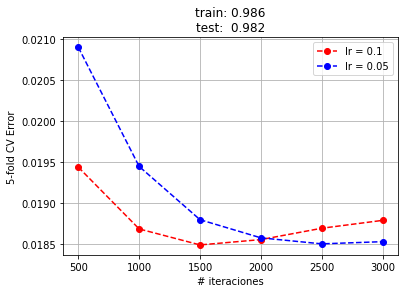

In [30]:
bt = GradientBoostingRegressor(random_state=0, max_depth=max_depth,learning_rate= 0.1, n_estimators= 1500)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [31]:
ytrainridge = bt.predict(X_train)
ytestridge  = bt.predict(X_test)
mseTrainModel = mean_squared_error(y_train,ytrainridge)
mseTestModel = mean_squared_error(y_test,ytestridge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModel)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModel)

MSE Modelo Ridge (train): 2.24e+05
MSE Modelo Ridge (test) : 2.86e+05


### Ajustamos de nuevo los parametros ajustando la profundidad

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000, 2500,3000]
learningRate = [0.1,0.05]
max_depth=4
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=max_depth), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.982
best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}


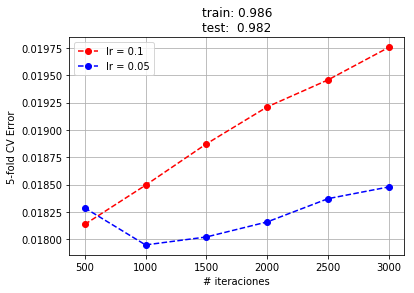

In [33]:
bt = GradientBoostingRegressor(random_state=0, max_depth=max_depth,learning_rate= 0.05, n_estimators= 1000)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [34]:
ytrainridge = bt.predict(X_train)
ytestridge  = bt.predict(X_test)
mseTrainModel = mean_squared_error(y_train,ytrainridge)
mseTestModel = mean_squared_error(y_test,ytestridge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModel)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModel)

MSE Modelo Ridge (train): 2.17e+05
MSE Modelo Ridge (test) : 2.83e+05


## Conclusiones

En esta parte de la practica,he elegido los algoritmos de regresión lineal, optimizandolos tanto con Ridge como con Lasso y Boosted trees. En el caso de Ridge y Lasso, he intentado con polinomios de diferentes grados y buscando el mejor parámetro para cada algoritmo. En el cao de Boosted trees, lo mismo, he intentado encontrar los parámetros optimos del algoritmo.

Como resultados podemos ve que para la regresión lineal, la mejor opción es utilizar un polinomio de grado 3, ridge co un alpha de 0.1.

Pero este algoritmo es superado por boosted trees con unos parámetros de max_depth=4, N-estimators=1000 y un learning-rate=0.05 